# Training with continuous rescaling of the PV range

In [1]:
import os
os.chdir('../')

In [6]:
from utils import *
from loader import *

logging.disable(logging.CRITICAL)

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [7]:
data_path = 'data-files/'
nbr_species = 21
nbr_rows = 1536
nbr_cols = 1024

layer = 10 #chose layer to inspect

files = [i for i in listdir(data_path) if isfile(join(data_path + i))]

state_space_names = []
state_space_source_names = [] #to check it is the same order as the state space
Not_species = ["T","U","V","W","X","Z"]
state_space = np.zeros((1,nbr_species))
data_state_space = np.zeros((nbr_rows*nbr_cols,nbr_species))
data_state_space_source = np.zeros((nbr_rows*nbr_cols,nbr_species))
data_mf = np.zeros((nbr_rows*nbr_cols,1))
data_T = np.zeros((nbr_rows*nbr_cols,1))

counter_state_space = 0
counter_state_space_source = 0

for file in files:
    if file.endswith('.mat'):
        print(f"Busy with {file}")

        data = loadmat(data_path + file)

        filename = file.removesuffix('.mat')
        file_data = np.array(data[filename])
        

        #if name of the file is not starting with an uppercase
        if(not file[0] == "R" and file[0].isupper() and file[0] not in Not_species):
            state_space_names.append(file.removesuffix('_3D_slice.mat'))
            flattened_data = file_data[layer, 0][0, :, :].flatten()
            data_state_space[:,counter_state_space] = flattened_data

            counter_state_space+=1

        elif(file[0] == "R"):
            state_space_source_names.append(file.removesuffix('_3D_slice.mat'))
            flattened_data = file_data[layer, 0][0, :, :].flatten()
            data_state_space_source[:,counter_state_space_source] = flattened_data

            counter_state_space_source+=1

        elif(file[0] == "Z"):

            flattened_data = file_data[layer, 0][0, :, :].flatten()
            data_mf[:,0] = flattened_data
            
            print()
            print("mass fraction data done")
            print()

        elif(file[0] == "T"):

            flattened_data = file_data[layer, 0][0, :, :].flatten()
            data_T[:,0] = flattened_data
            
            print()
            print("Temperature data done")
            print()

print(state_space_names)
print(f"counters of state space and sources are {counter_state_space} and {counter_state_space_source}")

Busy with curvature_Condi_3D_slices.mat
Busy with H2NN_3D_slice.mat
Busy with H2O2_3D_slice.mat
Busy with H2O_3D_slice.mat
Busy with H2_3D_slice.mat
Busy with HNO_3D_slice.mat
Busy with HO2_3D_slice.mat
Busy with HONO2_3D_slice.mat
Busy with HONO_3D_slice.mat
Busy with H_3D_slice.mat
Busy with N2H3_3D_slice.mat
Busy with N2O_3D_slice.mat
Busy with N2_3D_slice.mat
Busy with NH2_3D_slice.mat
Busy with NH_3D_slice.mat
Busy with NNH_3D_slice.mat
Busy with NO2_3D_slice.mat
Busy with NO_3D_slice.mat
Busy with N_3D_slice.mat
Busy with O2_3D_slice.mat
Busy with OH_3D_slice.mat
Busy with O_3D_slice.mat
Busy with RH2NN_3D_slice.mat
Busy with RH2O2_3D_slice.mat
Busy with RH2O_3D_slice.mat
Busy with RH2_3D_slice.mat
Busy with RHNO_3D_slice.mat
Busy with RHO2_3D_slice.mat
Busy with RHONO2_3D_slice.mat
Busy with RHONO_3D_slice.mat
Busy with RH_3D_slice.mat
Busy with RN2H3_3D_slice.mat
Busy with RN2O_3D_slice.mat
Busy with RN2_3D_slice.mat
Busy with RNH2_3D_slice.mat
Busy with RNH_3D_slice.mat
Busy w

C:\Windows\Temp\ipykernel_32788\3064301967.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


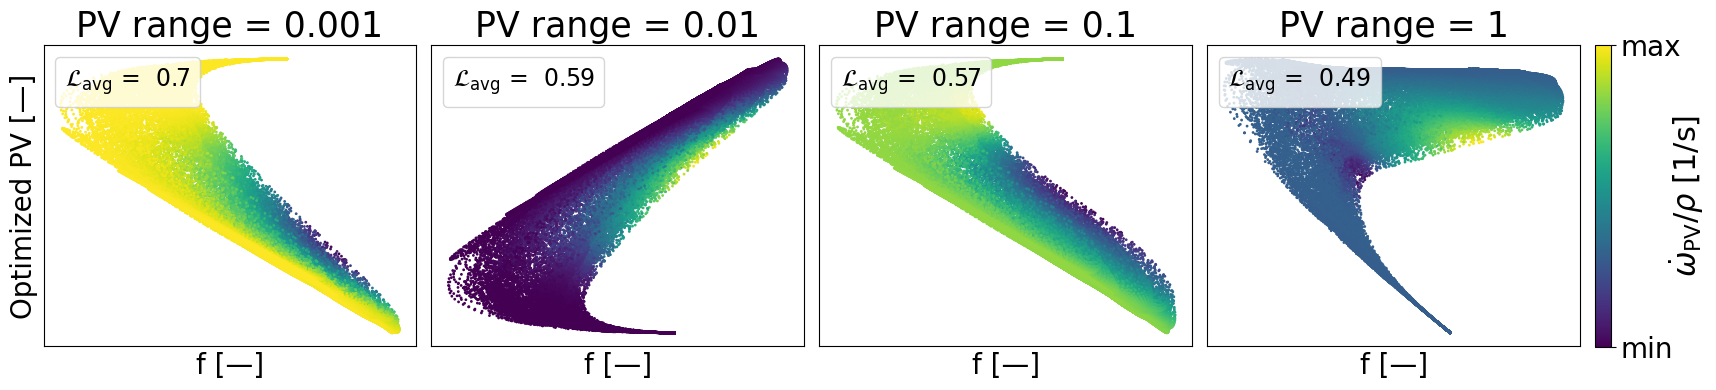

In [16]:
path_metadata = "metadata/"
filename_species_names = "Xu-state-space-names.csv"
path_data = "data-files/"

path_state = path_data + "Xu-state-space-low.csv"

save = True
pathSave = f"C:/Users/Admin/Documents/Parente/Figures/2024-PV-optimization/Paper/A priori/Optimized/"
name = f"f-PV manifolds - DNS - always rescaling PV range.png"


model_names = [ "Xu-AE-opt_RMSprop-epo_100000-lr_0.025-date_18Aug2025-hour_15h02_Tr35a_alwaysRescale0001_s2",
                "Xu-AE-opt_RMSprop-epo_100000-lr_0.025-date_02Sep2025-hour_19h27_Tr35a_alwaysRescale001_s0",
                "Xu-AE-opt_RMSprop-epo_100000-lr_0.025-date_21Aug2025-hour_01h08_Tr35a_alwaysRescale01_s5",
                "Xu-AE-opt_RMSprop-epo_100000-lr_0.025-date_21Aug2025-hour_01h06_Tr35a_alwaysRescale1_s6"]
avg_cost = [0.70,
            0.59,
            0.57,
            0.49]


rows, cols = 1, len(model_names)
fig, axes = plt.subplots(rows, cols, figsize=(16, 4))  # Define the grid
axes = axes.flatten()


idx_axis = 0

for filename in model_names:

    filename_metadata = filename + "_metadata.pkl"
    loader = loadData(filename_species_names, path_metadata, filename_metadata)
    idx_species_removed = loader.metadata["idx species removed"]
    model = loader.loadModel()
    idx_species_removed = loader.metadata["idx species removed"]
    range_PV = loader.metadata["scale PV"]
    

    optimized_PV = model.get_PV(torch.from_numpy(np.delete(data_state_space, idx_species_removed, axis=1))).detach().numpy()
    optimized_PV_source = model.get_PV(torch.from_numpy(np.delete(data_state_space_source, idx_species_removed, axis=1))).detach().numpy()
    

    ax = axes[idx_axis]
    sc = ax.scatter(data_mf, optimized_PV, c=optimized_PV_source, cmap="viridis", s=1)

    ax.set_xlabel("f [\u2014]", fontsize = 20)
    ax.set_xticks([])
    if(idx_axis == 0):
        ax.set_ylabel(f'Optimized PV [\u2014]', fontsize = 20)
    ax.set_yticks([])
    ax.set_title(f"PV range = {range_PV}", fontsize=25)

    dummy = Line2D([], [], color='none', label=f"$\mathcal{{L}}_{{\mathrm{{avg}}}}$ =  {avg_cost[idx_axis]}")
    ax.legend(handles=[dummy], loc='upper left', fontsize = 17,
                   handlelength=0, handletextpad=0)
    
    if(idx_axis==len(model_names)-1):
        cax = fig.add_axes([1, 0.12, 0.01, 0.755])
        cbar = fig.colorbar(sc, cax=cax, orientation='vertical')
        cbar.set_label(r'$\dot{\omega}_{\mathrm{PV}} / \rho$ [1/s]', fontsize=22, labelpad = -10)

        vmin = optimized_PV_source.min()
        vmax = optimized_PV_source.max()
        cbar.set_ticks([vmin, vmax])
        cbar.set_ticklabels([f"min", f"max"])
        cbar.ax.tick_params(labelsize=20)

    idx_axis += 1


plt.tight_layout()
if(save):
        plt.savefig(f"{pathSave}{name}", dpi = 300, bbox_inches="tight")
plt.show()